   x1  x2  x3  x4      y
0   3   3   3   3  0.787
1   8  30   8   8  0.293
2   3   6   6   6  1.710
3   4   4   4  12  0.203
4   8   7   6   5  0.806

-----------
Normal probability plot of the residuals.



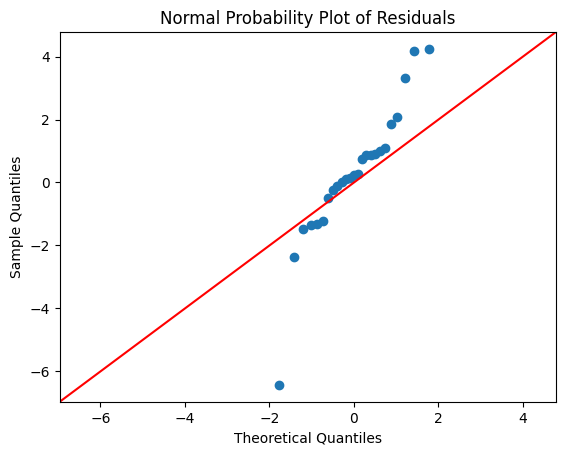


-----------

Plot of the residuals versus the predicted response.



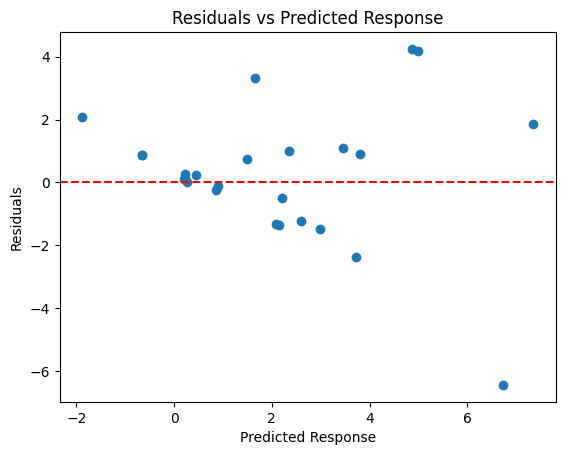


-----------


Influential Observations table

      dfb_x1    dfb_x2    dfb_x3    dfb_x4   cooks_d  standard_resid  \
0  -0.000995  0.002875 -0.001616 -0.002612  0.000011       -0.052024   
1   1.797203 -4.050939  0.860170 -0.262353  2.191741       -3.581414   
2   0.018409  0.013347 -0.016901 -0.026578  0.000913       -0.217383   
3  -0.136115 -0.316876 -0.741718  1.356619  0.466402        1.297838   
4  -0.071647  0.062256 -0.059335 -0.003114  0.005959       -0.592084   
5   0.014740  0.137277 -0.049066 -0.006372  0.008583        0.424819   
6  -0.019917  0.005019  0.002028 -0.000706  0.000150       -0.109012   
7  -0.484595  1.572401 -0.445253 -0.103771  0.549652        2.197380   
8  -0.168842 -0.081979  0.826820 -0.511224  0.187423        1.040028   
9  -0.513758  0.157386 -0.311582  0.346930  0.121070       -1.176385   
10 -0.096492  0.000432  0.047524  0.084936  0.010079        0.509822   
11  0.002501 -0.001595  0.000101  0.000225  0.000002        0.011087   
12 -0.006903  0.0

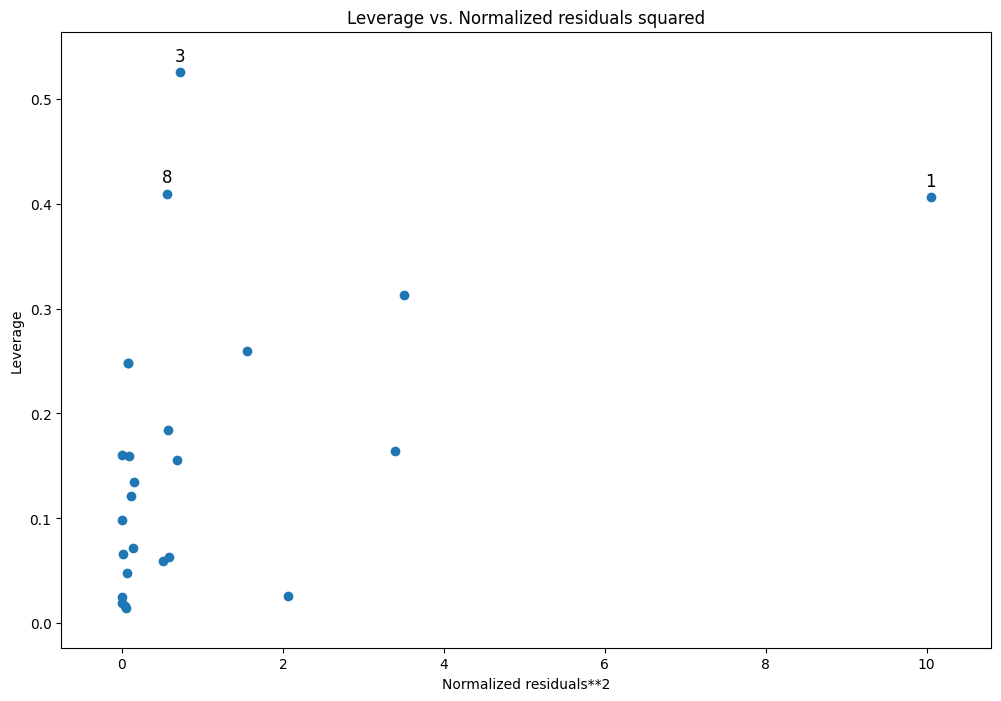


dffits_limit: 0.8 

Please pay attention to the following values:

      dfb_x1    dfb_x2    dfb_x3    dfb_x4   cooks_d  standard_resid  \
1   1.797203 -4.050939  0.860170 -0.262353  2.191741       -3.581414   
3  -0.136115 -0.316876 -0.741718  1.356619  0.466402        1.297838   
7  -0.484595  1.572401 -0.445253 -0.103771  0.549652        2.197380   
8  -0.168842 -0.081979  0.826820 -0.511224  0.187423        1.040028   
13 -0.212420 -0.016170  0.869503 -0.540022  0.189878        1.963080   

    hat_diag  dffits_internal  student_resid    dffits  
1   0.406000        -2.960906      -5.602299 -4.631656  
3   0.525525         1.365872       1.320630  1.389859  
7   0.312876         1.482770       2.443682  1.648972  
8   0.409366         0.865849       1.042158  0.867622  
13  0.164639         0.871501       2.120155  0.941233  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.regressionplots import plot_partregress_grid

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
url = 'https://raw.githubusercontent.com/ramirezramiro/linear-reg/main/Diagnostics%20for%20leverage%20and%20influence%20(ch.6)/data(ch.6)/table-b14.csv'
df = pd.read_csv(url)

specific_columns = df[["x1","x2","x3","x4","y"]]
print(specific_columns.head())


# Extract the features (X) and target variable (y) for model 1 (x6 and x7)
X = specific_columns[["x1", "x2", "x3", "x4"]].values
y = specific_columns["y"].values

model = sm.OLS(y, X)
results = model.fit()
residuals = results.resid
y_pred = results.predict(X)

print("\n-----------")
print("Normal probability plot of the residuals.\n")
# Print the mathematical function of the model

sm.qqplot(residuals, line='45')

# Customize the plot
plt.title('Normal Probability Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
# Display the plot
plt.show()
print("\n-----------\n")

print("Plot of the residuals versus the predicted response.\n")

# Plot the residuals versus the predicted response
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

# Customize the plot
plt.title('Residuals vs Predicted Response')
plt.xlabel('Predicted Response')
plt.ylabel('Residuals')

# Display the plot
plt.show()
print("\n-----------\n")

print("\nInfluential Observations table\n")
# Detect influential observations
influence = results.get_influence()
summary_table = influence.summary_frame()

# Calculate DFFITS
dffits = influence.dffits[0]

# Print the summary table of influential observations with DFFITS and DFBETAS
print(summary_table)

# Plot the Cook's distance
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_leverage_resid2(results, ax=ax)

plt.show()

# Calculate DFFITS Limit
n = X.shape[0]  # Number of observations
p = X.shape[1]  # Number of predictors
dffits_limit = 2 * np.sqrt(p / n)
print ("\ndffits_limit:",dffits_limit, "\n")

print("Please pay attention to the following values:\n")
print(summary_table[abs(summary_table['dffits']) > dffits_limit])